## Predicting Nova Group( processing level of the food) from the nutrients

In [2]:
import pandas as pd
import time

In [3]:
start_time = time.time()
df = pd.read_csv('C:/Users/rampa/Downloads/en.openfoodfacts.org.products.csv/en.openfoodfacts.org.products.csv',on_bad_lines='skip',sep="\t")
end_time = time.time()
print("Time taken to read the csv file: ", end_time - start_time)

C:\Users\rampa\AppData\Local\Temp\ipykernel_20604\1513714696.py:2: DtypeWarning: Columns (0,11,17,31,32,33,34,35,52,56,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/rampa/Downloads/en.openfoodfacts.org.products.csv/en.openfoodfacts.org.products.csv',on_bad_lines='skip',sep="\t")


Time taken to read the csv file:  319.75115394592285


In [4]:
df.shape

(3620644, 206)

In [5]:
df[df.nova_group.notna()].shape

(953712, 206)

In [6]:
nova_group_df = df[df.nova_group.notna()]
# nova_group_df.to_csv('C:/Users/rampa/Downloads/nova_group.csv',index=False)

In [7]:
nova_group_df.nova_group.value_counts()

nova_group
4.0      599932
3.0      182606
1.0      110257
2.0       60916
361.0         1
Name: count, dtype: int64

In [8]:
# Basic Information
basic_info = [
    'code', 'url', 'creator', 'created_t', 'created_datetime', 
    'last_modified_t', 'last_modified_datetime', 'last_modified_by',
    'last_updated_t', 'last_updated_datetime'
]

# Product Details
product_details = [
    'product_name', 'abbreviated_product_name', 'generic_name', 'quantity', 
    'packaging', 'packaging_tags', 'packaging_en', 'packaging_text'
]

# Brand & Category
brand_category = [
    'brands', 'brands_tags', 'categories', 'categories_tags', 
    'categories_en', 'origins', 'origins_tags', 'origins_en',
    'manufacturing_places', 'manufacturing_places_tags'
]

# Labels & Certifications
labels_certifications = [
    'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 
    'first_packaging_code_geo'
]

# Market & Purchase Information
market_purchase_info = [
    'cities_tags', 'purchase_places', 'stores', 'countries', 
    'countries_tags', 'countries_en'
]

# Ingredients & Allergens
ingredients_allergens = [
    'ingredients_text', 'ingredients_tags', 'ingredients_analysis_tags', 
    'allergens', 'traces', 'traces_tags', 'traces_en'
]

# Serving & Nutritional Information
serving_nutrition_info = [
    'serving_size', 'serving_quantity', 'no_nutrition_data', 'additives_n', 
    'additives_tags', 'additives_en'
]

# Health & Nutrition Scores
health_nutrition_scores = [
    'nutriscore_score', 'nutriscore_grade', 'nova_group', 
    'pnns_groups_1', 'pnns_groups_2'
]

# Food Group Classification
food_group_classification = [
    'food_groups', 'food_groups_tags', 'food_groups_en'
]

# Product Status & Quality
product_status_quality = [
    'states', 'states_tags', 'states_en', 'brand_owner', 
    'environmental_score_score', 'environmental_score_grade', 
    'nutrient_levels_tags'
]

# Product Popularity & Data Quality
popularity_data_quality = [
    'product_quantity', 'owner', 'data_quality_errors_tags', 
    'unique_scans_n', 'popularity_tags', 'completeness'
]

# Image Data
image_data = [
    'last_image_t', 'last_image_datetime', 'main_category', 
    'main_category_en', 'image_url', 'image_small_url', 
    'image_ingredients_url', 'image_ingredients_small_url', 
    'image_nutrition_url', 'image_nutrition_small_url'
]

# Nutritional Information per 100g
nutritional_info_100g = [
    'energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g',
    'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
    'omega-3-fat_100g', 'omega-6-fat_100g', 'alpha-linolenic-acid_100g', 'trans-fat_100g',
    'cholesterol_100g'
]

# Carbohydrates & Sugars
carbohydrates_sugars = [
    'carbohydrates_100g', 'sugars_100g', 'added-sugars_100g', 
    'lactose_100g', 'starch_100g', 'polyols_100g'
]

# Fiber & Protein
fiber_protein = [
    'fiber_100g', 'soluble-fiber_100g', 'insoluble-fiber_100g', 'proteins_100g'
]

# Salt & Minerals
salt_minerals = [
    'salt_100g', 'sodium_100g', 'bicarbonate_100g', 'potassium_100g', 
    'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 
    'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 
    'fluoride_100g', 'selenium_100g', 'iodine_100g'
]

# Other Compounds
other_compounds = [
    'alcohol_100g', 'caffeine_100g', 'fruits-vegetables-nuts_100g', 
    'fruits-vegetables-nuts-dried_100g', 'fruits-vegetables-nuts-estimate_100g',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'cocoa_100g', 
    'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 
    'phylloquinone_100g'
]


In [9]:
nova_group_df[food_group_classification].sample(120)

,food_groups,food_groups_tags,food_groups_en
1095619,en:cheese,"en:milk-and-dairy-products,en:cheese","Milk and dairy products,Cheese"
694117,en:sweetened-beverages,"en:beverages,en:sweetened-beverages","Beverages,Sweetened beverages"
2299426,en:biscuits-and-cakes,"en:sugary-snacks,en:biscuits-and-cakes","Sugary snacks,Biscuits and cakes"
1457372,en:unsweetened-beverages,"en:beverages,en:unsweetened-beverages","Beverages,Unsweetened beverages"
451785,NaN,NaN,NaN
...,...,...,...
2381596,en:cereals,"en:cereals-and-potatoes,en:cereals","Cereals and potatoes,Cereals"
710516,en:dressings-and-sauces,"en:fats-and-sauces,en:dressings-and-sauces","Fats and sauces,Dressings and sauces"
2273913,NaN,NaN,NaN
157994,NaN,NaN,NaN


In [10]:
nova_group_df.food_groups.value_counts()

food_groups
en:sweets                              80395
en:biscuits-and-cakes                  65750
en:dressings-and-sauces                52303
en:one-dish-meals                      40350
en:cereals                             39184
en:cheese                              32502
en:sweetened-beverages                 32343
en:fats                                31782
en:unsweetened-beverages               29306
en:milk-and-yogurt                     29194
en:processed-meat                      27799
en:vegetables                          24861
en:bread                               24224
en:chocolate-products                  16179
en:appetizers                          15832
en:salty-and-fatty-products            14000
en:fruits                              13855
en:breakfast-cereals                   12450
en:meat-other-than-poultry             10749
en:artificially-sweetened-beverages     9546
en:fatty-fish                           9418
en:alcoholic-beverages                  938

In [11]:
nova_group_df[nova_group_df.food_groups == 'en:sweets']['nova_group'].value_counts()

nova_group
4.0    54309
2.0    22023
3.0     3712
1.0      351
Name: count, dtype: int64

In [12]:
nova_group_df[nova_group_df.food_groups == 'en:sweetened-beverages']['nova_group'].value_counts()

nova_group
4.0    27777
3.0     4330
1.0      226
2.0       10
Name: count, dtype: int64

In [13]:
nova_group_df[["ingredients_tags","ingredients_text"]].head()

,ingredients_tags,ingredients_text
3,"en:blanches-almonds,en:nut,en:tree-nut,en:almond",Mandeln blanchiert
4,"en:thiamin,en:biotin,en:vitamins,en:chromium,e...","Thiamin, Biotin, Chromium, Garcinia cambogia f..."
7,"en:plum,en:fruit,en:prunus-species-fruit,en:e202","california dried pitted plums, potassium sorbate"
8,"en:apricot-juice-and-puree,en:fruit,en:prunus-...","Jus et purée d'abricots (50%), eau, sucre."
11,"en:soy-protein-isolate,en:protein,en:plant-pro...","Sojaproteinisolat, Weizen - protein, Kaffee-Ex..."


In [14]:
nova_group_df["ingredients_text"].sample(10).tolist()

["Pêches* 50%, jus de pommes à faible acidité* à base de jus de pommes concentré, semoule de riz*, amidon de riz*, antioxydant : acide ascorbique. *Produits issus de l'agriculture biologique.",
 'Sugar, Glucose Syrup, Wheat Flour, Palm Fat, Cocoa Butter, Full Cream Milk Powder, Skimmed Milk Powder, Fat Reduced Cocoa, Salt, Vanilla Extract, Emulsifier (Soya Lecithin), Raising Agent (E500) Allergy Information May contain: Hazelnut, Almond, Barley, Oats. Number of uses Portions per pack: 2, Portion size: 23g Net Contents 46g e',
 'Almonds, worcestershire (white vinegar, water, molasses, balsamic vinegar, hoisin, olive oil, fish sauce, onion, jalapeno, ginger, garlic, tomato paste, salt, pepper), ghee, coconut sugar, salt, paprika, ancho chili powder, onion powder, ground mustard, pepper, celery seed, cayenne.',
 'Wheat flour, palm oil, water, sugar, soybean oil, dextrose, salt, mono - and diglycerides.',
 "Viande de porc (92%), eau, sel, sucres (dextrose, saccharose), arômes naturels, épi

In [15]:
nova_group_df[(nova_group_df.food_groups == 'en:sweetened-beverages') & (nova_group_df.nova_group == 1.0)][ingredients_allergens]

,ingredients_text,ingredients_tags,ingredients_analysis_tags,allergens,traces,traces_tags,traces_en
23432,"Purified water, organic lemon juice, organic g...","en:filtered-water,en:water,en:lemon-juice,en:f...","en:palm-oil-free,en:vegan,en:vegetarian",NaN,NaN,NaN,NaN
72805,"Cane syrup solids, black tea, tricalcium phosp...","en:cane-sugar-syrup,en:added-sugar,en:disaccha...","en:palm-oil-content-unknown,en:vegan-status-un...",NaN,NaN,NaN,NaN
77094,"Water, organic lemon juice, organic agave syru...","en:water,en:lemon-juice,en:fruit,en:juice,en:f...","en:palm-oil-free,en:vegan-status-unknown,en:ve...",NaN,NaN,NaN,NaN
77095,"Water, organic juice from (organic limes, orga...","en:water,en:juice,en:agave-syrup,en:added-suga...","en:palm-oil-free,en:vegan,en:vegetarian",NaN,NaN,NaN,NaN
77100,"Water, lemon juice*, agave syrup*, pepper extr...","en:water,en:lemon-juice,en:fruit,en:juice,en:f...","en:palm-oil-free,en:vegan-status-unknown,en:ve...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3499445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3499480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3502203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3504942,"Milk solids, sugar syrup, contains added artif...","en:milk-solids,en:dairy,en:milk,en:sugar-syrup...","en:palm-oil-content-unknown,en:non-vegan,en:ve...",NaN,NaN,NaN,NaN


In [16]:
nutri_cols = [col for col in df.columns if "_100g" in col]
nutri_cols

['energy-kj_100g',
 'energy-kcal_100g',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'unsaturated-fat_100g',
 'monounsaturated-fat_100g',
 'omega-9-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'omega-6-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'oleic-acid_100g',
 'elaidic-acid_100g',
 'gondoic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'added-

In [17]:
nova_group_df[nutri_cols].head()

,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
3,NaN,48.0,201.0,NaN,0.6,0.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6000.0,250.0,6000.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,840.0,208.0,840.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1510.0,358.0,1510.0,NaN,2.0,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [19]:
nova_group_df = nova_group_df[nova_group_df["nova_group"] != 361.0]
nova_group_df["nova_group"] = nova_group_df["nova_group"].astype("category")

In [20]:
nova_group_df.nova_group.value_counts()

nova_group
4.0    599932
3.0    182606
1.0    110257
2.0     60916
Name: count, dtype: int64

In [21]:
X = nova_group_df[nutri_cols]
y = nova_group_df["nova_group"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
model_predict = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

         1.0       0.88      0.81      0.84     22119
         2.0       0.94      0.93      0.94     12260
         3.0       0.81      0.59      0.68     36426
         4.0       0.87      0.95      0.91    119938

    accuracy                           0.87    190743
   macro avg       0.87      0.82      0.84    190743
weighted avg       0.86      0.87      0.86    190743



<Axes: >

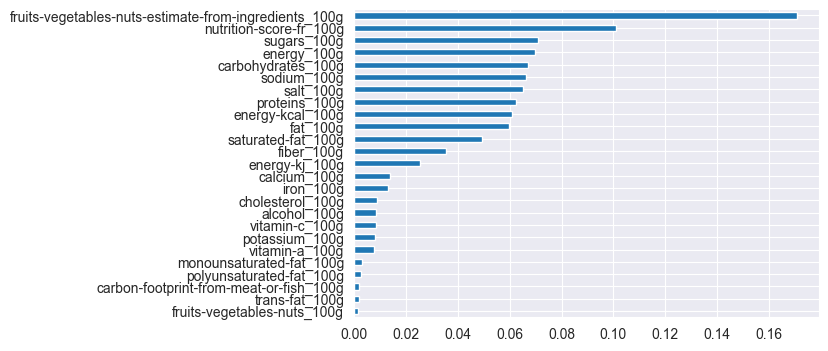

In [24]:
importance = pd.Series(model.feature_importances_, index=X_train.columns)
importance.nlargest(25).sort_values(ascending=True).plot(kind='barh', figsize=(6,4))

In [60]:
import pickle
filename = 'models/nova_score_rf.pkl'
pickle.dump(model, open(filename, 'wb'))

In [25]:
[col for col in nutri_cols if "estimate" in col]

['fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

In [26]:
curated_features = importance.nlargest(25).reset_index()["index"].tolist()

In [27]:
curated_features.reverse()

In [28]:
curated_features[:-2].reverse()

In [29]:
final_features = curated_features[:-2]

In [30]:
final_features.reverse()

In [31]:
features = final_features[0:20]

In [32]:
X = nova_group_df[features]
y = nova_group_df["nova_group"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
model_predict = model.predict(X_test)
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

         1.0       0.83      0.67      0.74     22119
         2.0       0.90      0.60      0.72     12260
         3.0       0.79      0.57      0.66     36426
         4.0       0.82      0.94      0.88    119938

    accuracy                           0.82    190743
   macro avg       0.83      0.69      0.75    190743
weighted avg       0.82      0.82      0.81    190743



<Axes: >

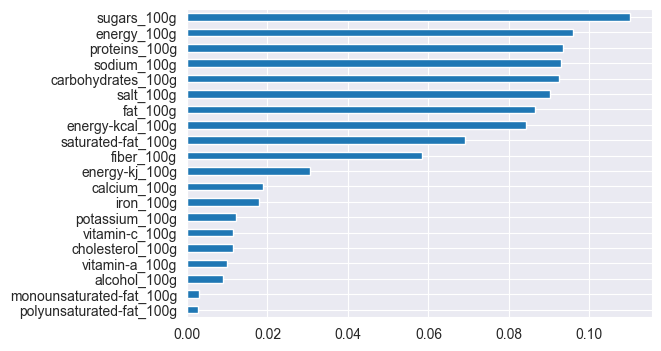

In [34]:
importance = pd.Series(model.feature_importances_, index=X_train.columns)
importance.nlargest(25).sort_values(ascending=True).plot(kind='barh', figsize=(6,4))

In [85]:
!pip install shap

   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   --- ----------------------------------- 41.0/456.2 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------- ------------------------------ 0.7/2.8 MB 20.8 MB/s eta 0:00:01
   --------------------- ------------------ 1.5/2.8 MB 16.4 MB/s eta 0:00:01
   ------------------------------------ --- 2.5/2.8 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 15.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
    --------------------------------------- 0.7/30.3 MB 14.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.6/30.3 MB 20.2 MB/s eta 0:00:02
   --- ------------------------------------ 2.3/30.3 MB 16.3 MB/s eta 0:00:02
   ---- 


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# import shap
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test)

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
!pip install lime
from lime.lime_tabular import LimeTabularExplainer

X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean())

# Convert categorical features to numeric
label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LIME Explainer
explainer = LimeTabularExplainer(
    X_train_scaled, 
    training_labels=y_train, 
    feature_names=X_train.columns, 
    class_names=model.classes_,
    discretize_continuous=True, 
    feature_selection="auto"
)

# Explain a single instance



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
exp = explainer.explain_instance(X_test_scaled[6], model.predict_proba)
exp.show_in_notebook(show_table=True, show_all=False)
exp.save_to_file('lime_explanation.html')

C:\Users\rampa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
